In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime

In [59]:
# Load the dataset
data = pd.read_csv('train.csv')
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [60]:
# Identify columns with missing values
cmv = data.columns[data.isnull().any()]
cmv

Index(['Mileage', 'Engine', 'Power', 'Seats', 'New_Price'], dtype='object')

In [61]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64

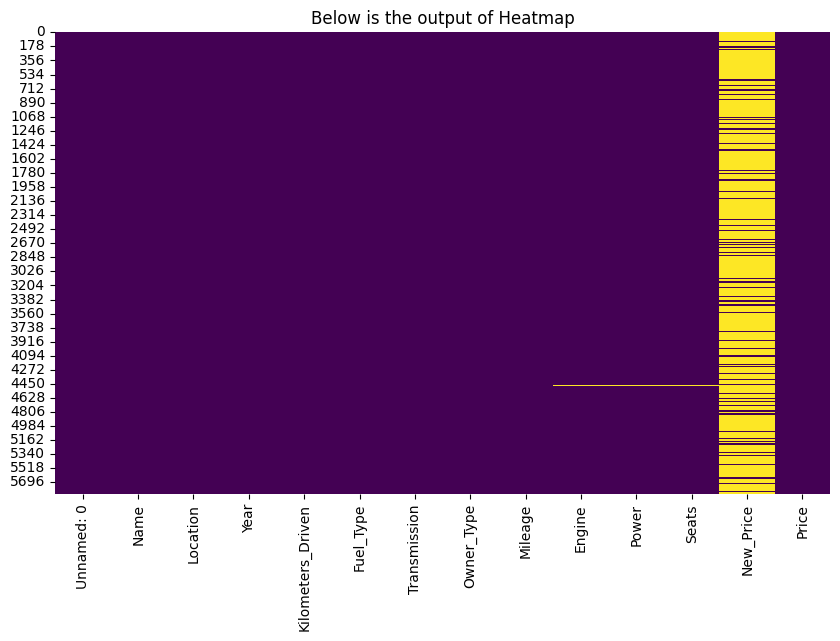

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Below is the output of Heatmap')
plt.show()

In [63]:
# Impute missing values or drop them
for col in cmv:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)  # Replace with mode for categorical data
    else:
        data[col].fillna(data[col].mean(), inplace=True)  # Replace with mean for numerical data

It is better to fill in missing values (impute) than to remove them (drop), because we can keep more data. However, imputing missing values can make the data biased, especially if the missing values are not spread out evenly.

Dropping missing values is easier, but it can lead to losing data. So, it is important to think about the specific situation before deciding whether to impute or drop missing values.

In the case of the used car dataset, I recommend imputing the missing values. This is because the dataset is relatively large and the missing values are not evenly distributed.

In [64]:
        
# Define a function to remove multiple units from a column using regex
def remove_units(text):
    pattern = re.compile(r'[^\d.]') 
    return re.sub(pattern, '', text)

columns_to_clean = ['Mileage', 'Engine', 'Power', 'New_Price']
for col in columns_to_clean:
    data[col] = data[col].apply(remove_units)
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
data.to_csv('new_train.csv',index = False)

In [65]:
r_data = pd.read_csv('new_train.csv')
r_data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,4.78,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13.00,1199,88.70,5.0,8.61,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,4.78,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,4.78,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,5.0,4.78,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,7.88,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.78,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,4.78,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0,4.78,2.65


In [66]:
# Convert categorical variables to one-hot encoded values
r_data = pd.get_dummies(r_data, columns=['Fuel_Type', 'Transmission'])

# Calculate the current year
c_yr = datetime.datetime.now().year

# Create a new feature for the current age of the car
r_data['Current_Age'] = c_yr - r_data['Year']
r_data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Current_Age
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582,126.20,5.0,4.78,12.50,1,0,0,0,1,8
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199,88.70,5.0,8.61,4.50,0,0,1,0,1,12
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248,88.76,7.0,4.78,6.00,1,0,0,0,1,11
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968,140.80,5.0,4.78,17.74,1,0,0,1,0,10
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461,63.10,5.0,4.78,3.50,1,0,0,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,First,28.40,1248,74.00,5.0,7.88,4.75,1,0,0,0,1,9
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,First,24.40,1120,71.00,5.0,4.78,4.00,1,0,0,0,1,8
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Second,14.00,2498,112.00,8.0,4.78,2.90,1,0,0,0,1,11
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,First,18.90,998,67.10,5.0,4.78,2.65,0,0,1,0,1,10
